# Sales Data Analysis with Pandas
# Comprehensive analysis of sales data using Python and Pandas


#Install Requirements

In [ ]:
%pip install pandas numpy matplotlib seaborn jupyter

In [11]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 Sales Data Analysis Project")
print("=" * 40)


📊 Sales Data Analysis Project



# ============================================================================
# STEP 1: CREATE SAMPLE SALES DATA (Skip if you have your own CSV)
# ============================================================================


In [12]:

def create_sample_data():
    """Create sample sales data for demonstration"""
    np.random.seed(42)
    
    # Generate date range
    start_date = datetime(2023, 1, 1)
    end_date = datetime(2024, 12, 31)
    dates = pd.date_range(start_date, end_date, freq='D')
    
    # Sample data parameters
    products = ['Laptop', 'Phone', 'Tablet', 'Headphones', 'Mouse', 'Keyboard', 'Monitor', 'Speaker']
    regions = ['North', 'South', 'East', 'West', 'Central']
    sales_reps = ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve', 'Frank', 'Grace', 'Henry']
    
    # Generate random sales data
    n_records = 5000
    
    data = {
        'Date': np.random.choice(dates, n_records),
        'Product': np.random.choice(products, n_records),
        'Region': np.random.choice(regions, n_records),
        'Sales_Rep': np.random.choice(sales_reps, n_records),
        'Quantity': np.random.randint(1, 20, n_records),
        'Unit_Price': np.random.uniform(50, 2000, n_records).round(2),
    }
    
    df = pd.DataFrame(data)
    df['Total_Sales'] = df['Quantity'] * df['Unit_Price']
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date').reset_index(drop=True)
    
    return df

# Create sample data
sales_df = create_sample_data()

# Save to CSV for demonstration
sales_df.to_csv('sales_data.csv', index=False)
print("✅ Sample sales data created and saved as 'sales_data.csv'")


✅ Sample sales data created and saved as 'sales_data.csv'



# ============================================================================
# STEP 2: LOAD CSV USING PANDAS
# ============================================================================


In [6]:

print("\n📥 Loading CSV Data")
print("-" * 20)

# Load the CSV file
df = pd.read_csv('sales_data.csv')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Display basic information about the dataset
print(f"Dataset Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())



📥 Loading CSV Data
--------------------
Dataset Shape: (5000, 7)
Columns: ['Date', 'Product', 'Region', 'Sales_Rep', 'Quantity', 'Unit_Price', 'Total_Sales']

First 5 rows:
        Date  Product   Region Sales_Rep  Quantity  Unit_Price  Total_Sales
0 2023-01-01  Speaker  Central     Frank         1     1761.02      1761.02
1 2023-01-01  Monitor  Central       Bob        19     1902.83     36153.77
2 2023-01-01  Monitor     East       Eve        18      969.61     17452.98
3 2023-01-01    Phone  Central       Bob        19     1631.66     31001.54
4 2023-01-01    Mouse  Central   Charlie         3      575.79      1727.37

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         5000 non-null   datetime64[ns]
 1   Product      5000 non-null   object        
 2   Region       5000 non-null   object        
 3  


# ============================================================================
# STEP 3: DATA ANALYSIS USING GROUPBY() AND SUM()
# ============================================================================


In [7]:

print("\n📈 Data Analysis with GroupBy Operations")
print("-" * 40)

# 1. Sales by Product
print("1. Total Sales by Product:")
product_sales = df.groupby('Product')['Total_Sales'].sum().sort_values(ascending=False)
print(product_sales)

# 2. Sales by Region
print("\n2. Total Sales by Region:")
region_sales = df.groupby('Region')['Total_Sales'].sum().sort_values(ascending=False)
print(region_sales)

# 3. Sales by Sales Representative
print("\n3. Total Sales by Sales Representative:")
rep_sales = df.groupby('Sales_Rep')['Total_Sales'].sum().sort_values(ascending=False)
print(rep_sales)

# 4. Monthly Sales Trend
print("\n4. Monthly Sales Trend:")
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total_Sales'].sum()
print(monthly_sales.head(10))

# 5. Advanced GroupBy Analysis
print("\n5. Advanced Analysis - Sales by Region and Product:")
region_product_sales = df.groupby(['Region', 'Product'])['Total_Sales'].sum().unstack().fillna(0)
print(region_product_sales)

# 6. Average metrics
print("\n6. Average Metrics:")
avg_metrics = df.groupby('Product').agg({
    'Total_Sales': ['mean', 'sum', 'count'],
    'Quantity': 'mean',
    'Unit_Price': 'mean'
}).round(2)
print(avg_metrics)



📈 Data Analysis with GroupBy Operations
----------------------------------------
1. Total Sales by Product:
Product
Phone         7236683.87
Monitor       6904348.63
Mouse         6617375.91
Headphones    6557497.49
Keyboard      6541553.86
Tablet        6523436.35
Laptop        6105981.88
Speaker       6080756.77
Name: Total_Sales, dtype: float64

2. Total Sales by Region:
Region
North      11313159.73
South      10793608.54
Central    10715354.03
East       10035066.51
West        9710445.95
Name: Total_Sales, dtype: float64

3. Total Sales by Sales Representative:
Sales_Rep
Bob        7155282.15
Grace      7127323.68
Henry      6928974.32
Eve        6585342.91
Frank      6573593.73
Diana      6353414.21
Alice      6133539.78
Charlie    5710163.98
Name: Total_Sales, dtype: float64

4. Monthly Sales Trend:
Month
2023-01    2305139.93
2023-02    1972854.16
2023-03    2143180.31
2023-04    2218635.28
2023-05    2312095.02
2023-06    1968316.77
2023-07    1966813.97
2023-08    2246376.2


# ============================================================================
# STEP 4: VISUALIZATION USING PLOT()
# ============================================================================



📊 Creating Visualizations
-------------------------


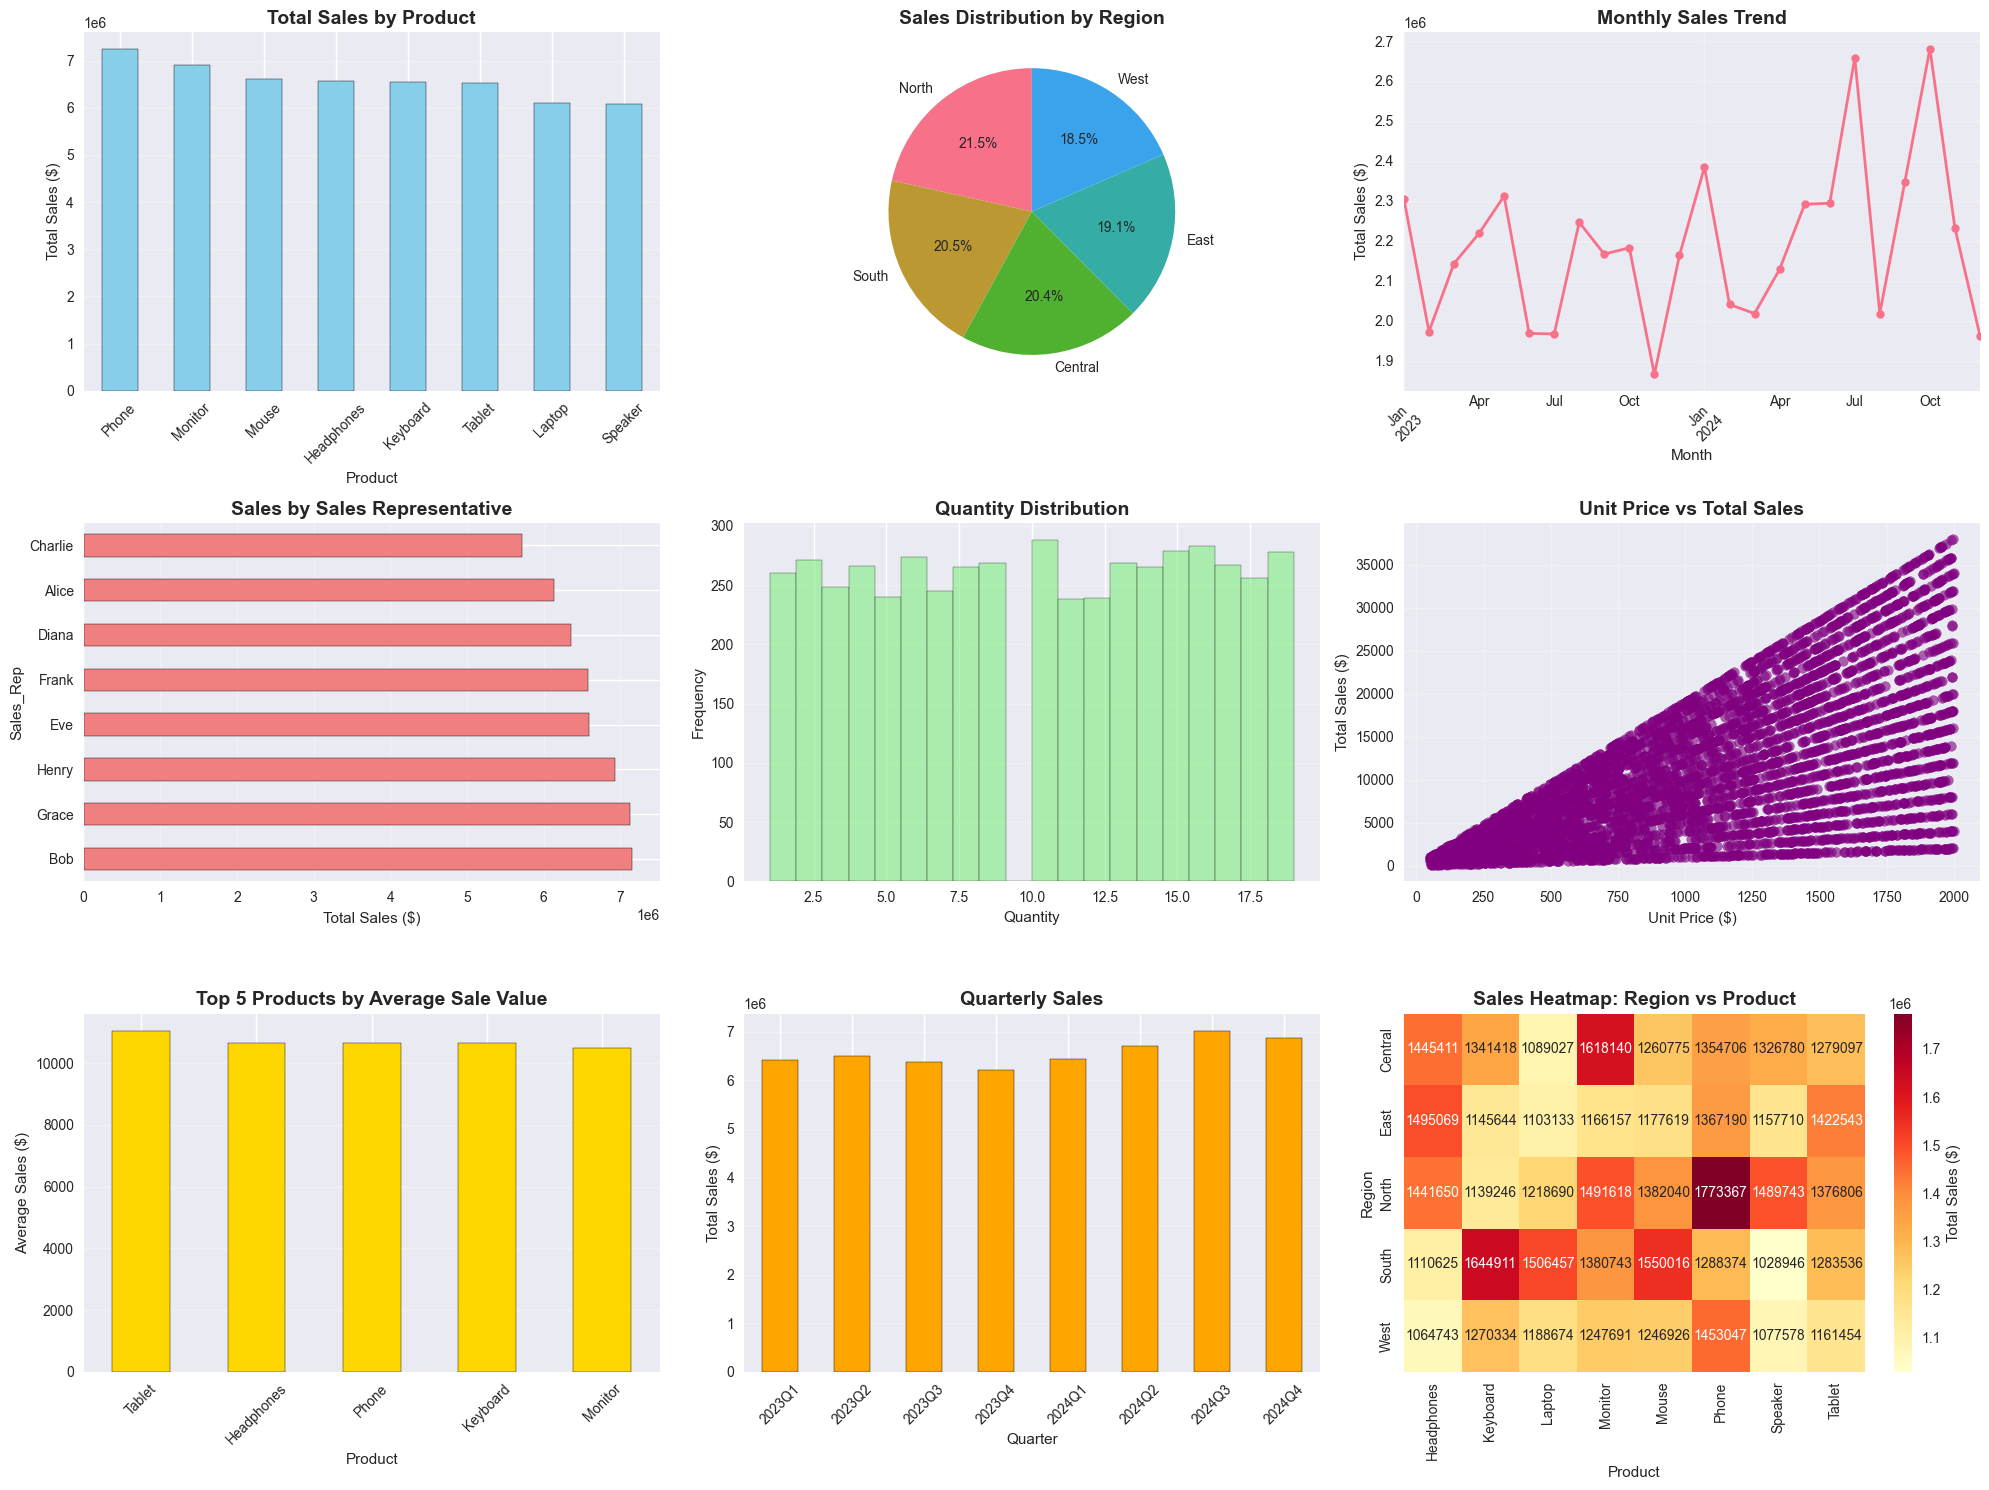

In [8]:

print("\n📊 Creating Visualizations")
print("-" * 25)

# Set up the plotting area
fig = plt.figure(figsize=(20, 15))

# 1. Sales by Product (Bar Chart)
plt.subplot(3, 3, 1)
product_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Sales by Product', fontsize=14, fontweight='bold')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# 2. Sales by Region (Pie Chart)
plt.subplot(3, 3, 2)
region_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Region', fontsize=14, fontweight='bold')
plt.ylabel('')

# 3. Monthly Sales Trend (Line Chart)
plt.subplot(3, 3, 3)
monthly_sales.plot(kind='line', marker='o', linewidth=2, markersize=6)
plt.title('Monthly Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 4. Sales by Sales Representative (Horizontal Bar Chart)
plt.subplot(3, 3, 4)
rep_sales.plot(kind='barh', color='lightcoral', edgecolor='black')
plt.title('Sales by Sales Representative', fontsize=14, fontweight='bold')
plt.xlabel('Total Sales ($)')
plt.grid(axis='x', alpha=0.3)

# 5. Quantity Distribution (Histogram)
plt.subplot(3, 3, 5)
df['Quantity'].plot(kind='hist', bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Quantity Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)

# 6. Unit Price vs Total Sales (Scatter Plot)
plt.subplot(3, 3, 6)
plt.scatter(df['Unit_Price'], df['Total_Sales'], alpha=0.6, color='purple')
plt.title('Unit Price vs Total Sales', fontsize=14, fontweight='bold')
plt.xlabel('Unit Price ($)')
plt.ylabel('Total Sales ($)')
plt.grid(True, alpha=0.3)

# 7. Top 5 Products by Average Sale Value
plt.subplot(3, 3, 7)
top_products = df.groupby('Product')['Total_Sales'].mean().nlargest(5)
top_products.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Top 5 Products by Average Sale Value', fontsize=14, fontweight='bold')
plt.xlabel('Product')
plt.ylabel('Average Sales ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# 8. Sales by Quarter
plt.subplot(3, 3, 8)
df['Quarter'] = df['Date'].dt.to_period('Q')
quarterly_sales = df.groupby('Quarter')['Total_Sales'].sum()
quarterly_sales.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Quarterly Sales', fontsize=14, fontweight='bold')
plt.xlabel('Quarter')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# 9. Heatmap of Sales by Region and Product
plt.subplot(3, 3, 9)
region_product_matrix = df.groupby(['Region', 'Product'])['Total_Sales'].sum().unstack().fillna(0)
sns.heatmap(region_product_matrix, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Total Sales ($)'})
plt.title('Sales Heatmap: Region vs Product', fontsize=14, fontweight='bold')
plt.xlabel('Product')
plt.ylabel('Region')

plt.tight_layout()
plt.show()



# ============================================================================
# STEP 5: KEY INSIGHTS AND SUMMARY
# ============================================================================


In [9]:

print("\n🔍 Key Insights Summary")
print("=" * 30)

# Calculate key metrics
total_sales = df['Total_Sales'].sum()
total_quantity = df['Quantity'].sum()
avg_order_value = df['Total_Sales'].mean()
top_product = product_sales.index[0]
top_region = region_sales.index[0]
top_rep = rep_sales.index[0]

print(f"💰 Total Sales Revenue: ${total_sales:,.2f}")
print(f"📦 Total Units Sold: {total_quantity:,}")
print(f"🛒 Average Order Value: ${avg_order_value:.2f}")
print(f"🏆 Top Selling Product: {top_product}")
print(f"🌟 Best Performing Region: {top_region}")
print(f"👑 Top Sales Representative: {top_rep}")

# Monthly growth analysis
monthly_sales_list = monthly_sales.tolist()
if len(monthly_sales_list) > 1:
    growth_rate = ((monthly_sales_list[-1] - monthly_sales_list[0]) / monthly_sales_list[0]) * 100
    print(f"📈 Overall Growth Rate: {growth_rate:.1f}%")

# Product performance insights
print(f"\n📊 Product Performance:")
for product in product_sales.head(3).index:
    sales = product_sales[product]
    percentage = (sales / total_sales) * 100
    print(f"   • {product}: ${sales:,.2f} ({percentage:.1f}% of total sales)")

print("\n✅ Analysis Complete!")
print("📋 Deliverables Generated:")
print("   • Comprehensive data analysis using groupby() and sum()")
print("   • Multiple visualizations using plot() method")
print("   • Key business insights and metrics")
print("   • CSV file loaded and processed successfully")



🔍 Key Insights Summary
💰 Total Sales Revenue: $52,567,634.76
📦 Total Units Sold: 50,425
🛒 Average Order Value: $10513.53
🏆 Top Selling Product: Phone
🌟 Best Performing Region: North
👑 Top Sales Representative: Bob
📈 Overall Growth Rate: -14.9%

📊 Product Performance:
   • Phone: $7,236,683.87 (13.8% of total sales)
   • Monitor: $6,904,348.63 (13.1% of total sales)
   • Mouse: $6,617,375.91 (12.6% of total sales)

✅ Analysis Complete!
📋 Deliverables Generated:
   • Comprehensive data analysis using groupby() and sum()
   • Multiple visualizations using plot() method
   • Key business insights and metrics
   • CSV file loaded and processed successfully



# ============================================================================
# BONUS: EXPORT RESULTS
# ============================================================================


In [ ]:

# Save key results to CSV files
product_sales.to_csv('product_sales_summary.csv', header=True)
region_sales.to_csv('region_sales_summary.csv', header=True)
monthly_sales.to_csv('monthly_sales_trend.csv', header=True)

print("\n💾 Results exported to CSV files:")
print("   • product_sales_summary.csv")
print("   • region_sales_summary.csv") 
print("   • monthly_sales_trend.csv")